> ###  ***Submitted by: Malaika Ahmed***

# ***🔴 Task 27: Evaluation Techniques for classification models***

Evaluation techniques for classification models help assess their performance and ensure they make accurate predictions. Key techniques include:
- ***Confusion Matrix:*** A table showing true positives, true negatives, false positives, and false negatives, providing a detailed breakdown of classification results.
- ***Accuracy:*** The ratio of correctly predicted instances to the total number of instances. It gives a general sense of how often the model is correct.
- ***Precision:*** The ratio of true positives to the sum of true positives and false positives. It measures the accuracy of positive predictions.
- ***Recall (Sensitivity):*** The ratio of true positives to the sum of true positives and false negatives. It measures the ability to identify all positive instances.
- ***F1 Score:*** The harmonic mean of precision and recall. It balances precision and recall, especially useful when dealing with imbalanced datasets.
- ***ROC Curve:*** A graphical representation of the true positive rate versus the false positive rate at various thresholds. It helps evaluate the trade-offs between true positives and false positives.
- ***AUC (Area Under the Curve):*** Measures the overall performance of the ROC curve. An AUC of 1 indicates a perfect model, while an AUC of 0.5 indicates a model with no discrimination ability.
- ***Cross-Validation:*** Splits the dataset into multiple folds to train and test the model on different subsets, providing a more robust estimate of model performance.
- ***Classification Report:*** A summary of precision, recall, F1 score, and support for each class, offering a comprehensive view of the model’s performance across different classes.


***

 # <span style='color:Red'>  **Evaluation Techniques** </span>
Evaluation metrics play a critical role in machine learning by providing quantitative insight into the performance of our models. They help us understand where our model excels and where it may fall short, enabling us to fine-tune our algorithms to achieve better results.

 # <span style='color:Blue'>  ***1. Confusion Matrix*** </span>

 A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.

 

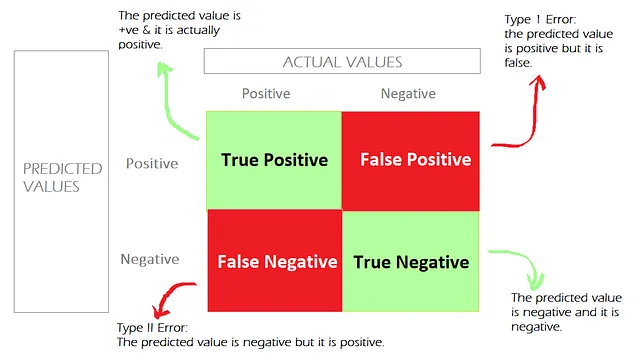

- A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier.
- A good model is one which has high TP and TN rates, while low FP and FN rates.- 
If you have an imbalanced dataset to work with, it’s always better to use confusion matrix as your evaluation criteria for your machine learning model
> #### The higher the values on the diagonal, the better the model’s performance for those particular classes
- 
Off-Diagonal Elements: The off-diagonal elements represent the misclassifications made by the model. Each element at position (i, j) indicates the count of samples from class i misclassified as class 
  > #### . Lower values for off-diagonal elements indicate fewer misclassificatios..)

### ***Binary Classification is broken down into 4 predicted types of values such as:***

- ***True positives:*** The number of observations in which the model correctly identified a patient as having the condition (1).

- ***True Negatives:*** The number of observations when the person is truly healthy (0) as opposed to the model’s prediction that they are healthy (0).

- ***False Positives:*** These are the instances where the model incorrectly predicted that a person has an illness (1) when they are healthy (0).

- ***False Negatives***: These are observations in which the model predicted that the subject would be in good health (0) but the subject was suffering from the condition (1).

***

 # <span style='color:Green'>  ***Creating a Confusion Matrix for Logistic Regression Model*** </span>


In [244]:
# Import Libraries
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score




In [201]:
df=pd.read_csv("heart.csv")

In [202]:
df.drop_duplicates(inplace=True)

In [203]:
df.duplicated().sum()

0

In [204]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [205]:
df.iloc[:,0:-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [206]:
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [207]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)


In [208]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

C:\Users\Malaika ahmad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [216]:
y_pred= LR.predict(X_test)


In [217]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8524590163934426

In [211]:
confusion_matrix(y_test,y_pred)


array([[24,  7],
       [ 2, 28]], dtype=int64)

In [212]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,24,7
1,2,28


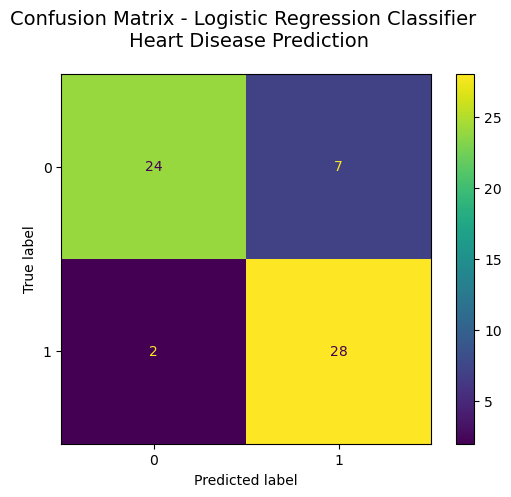

In [213]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - Logistic Regression Classifier \n Heart Disease Prediction',pad=20,fontsize=14)
plt.show()


### ***Insights from Confusion Matric of Logistic Regression Classifier***
- True Positives (TP) -> top-left (24): This represents the number of instances where the model correctly predicted the positive class (i.e., correctly predicted Heart Disease).

- True Negatives (TN)-> Bottom-Right (28): This represents the number of instances where the model correctly predicted the negative class (i.e., correctly predicted no Heart Disease)
  
- False Positives (FP)-> Top-right (7): This represents the number of instances where the model incorrectly predicted the positive class (i.e., predicted a Heart Disease when there was none).

- False Negatives (FN)->Bottom-left (2): This represents the number of instances where the model incorrectly predicted the negative class (i.e., predicted no Heart Disease when there actually was one).

***

***

***

 # <span style='color:Blue'>  ***2. Accuracy*** </span>
An Accuracy score (or simply Accuracy) is a Classification measure in Machine Learning that represents a percentage of correct predictions made by a model. Due to its simplicity in calculation and interpretation, the measure has found widespread use. Additionally, the performance of the model is quantified by a single number.
Negative

To get the Accuracy score, take the number of right guesses and divide it by the total number of predictions made.

> ####  ***Accuracy = Number of correct predictions/Total number of predictions***

The more formal formula is the following one.

> #### ***Accuracy = True Negatives + True Positive/ True Positive + False Positive + True Negative + False Negative***

***

### ***HOW TO INTERPRET THE ACCURACY SCORE VALUE?***
 - Increases in Accuracy occur as more of your forecasts come true. 
 - An improved measure would have a greater value. 
 - If a model made accurate predictions, it would have a value of 1, and if it didn’t, it would have a value of 0. (if a model did not make a single correct prediction).
 - 
Accuracy > 0.9 is a great score, Accuracy > 0.7 is a decent score, and Accuracy 0.7 is a mediocre score, 


 # <span style='color:Green'>  ***Calculating Accuracy Score*** </span>


In [219]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Logistic Regression for Heart Disease Prediction\n:",accuracy)


Accuracy Of Logistic Regression for Heart Disease Prediction
: 0.8524590163934426


***

***

***

 # <span style='color:Blue'>  ***3. Precision*** </span>
-  Precision quantifies the accuracy of positive prediction made by the model. In situations where minimizing false positives is a deal, precision serves as a crucial metric.
-  It is calculated as the ratio of true positives to the sum of true positives and false positives.
- For positive class: It measures of all the instances predicted as positive how many are actually positive.A higher precision score indicated fewer false positives.

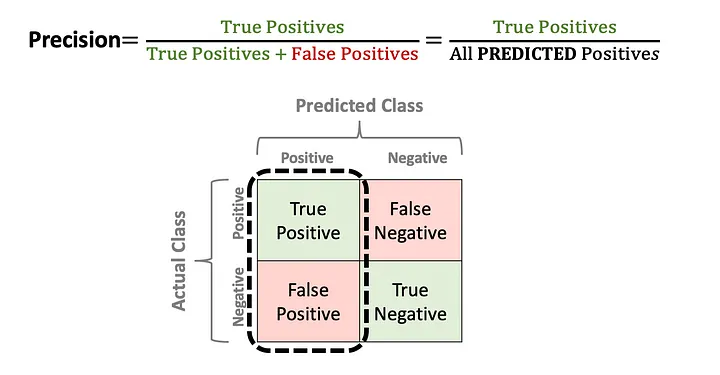



- For negative class: To calculate the precision score for the negative class, we need to treat the negative class as positive and the positive class as negative which will allows us to evaluate the accuracy of negative predicition. The precision for the negative class is also calculated as TP / (TP + FP), as we treat the negative class as positive, now TP is the number of true negatives and FP is the number of false positives.In short, for negative class, the precision score is determined by the number of true negatives and false negatives.
  

### ***Examples:***

-  Imagine you’re a doctor diagnosing patients for a disease. Precision is like the accuracy of your positive diagnoses.
> #### ***Precision tells you: “When I say someone has the disease, how often am I right?”***

High precision means you’re cautious and rarely misdiagnose healthy people as sick.



- Imagine your email as a mix of important messages and potential spam. Precision measures how well the filter identifies and keeps only the actual spam, preventing important emails from being mistakenly marked as spam. It’s about avoiding the situation where a crucial message ends up in the spam folder, which could be more problematic than having some spam emails in your inbox. So, high precision means the filter is doing a good job at catching spam without causing the hassle of losing important emails.




 # <span style='color:Green'>  ***Calculating Precision Score*** </span>


In [246]:
precision_score(y_test,y_pred)

0.8

***

***

***

 # <span style='color:Blue'>  ***4. Recall (Sensitivity)*** </span>


- Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. It is calculated as the ratio of true positives to the sum of true positives and false negatives.
- Recall indicates how many of the actual positive instances the model is able to correctly identify. A high recall indicates that the model is capturing most of the positive instances in the dataset.


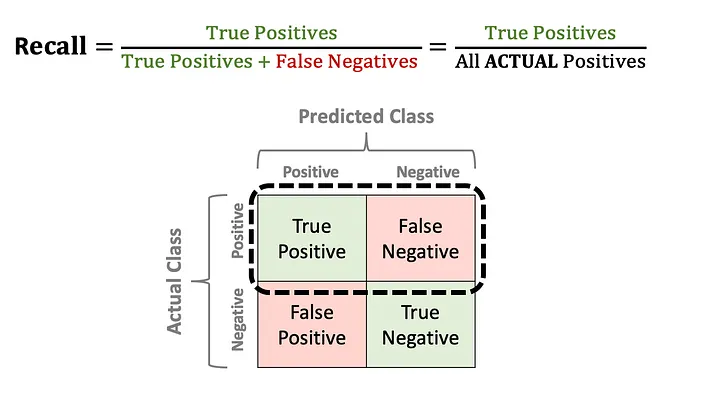

### ***Example:***
- Recall is how good you are at catching all the positive cases.
> #### ***Recall tells you: “Out of all the people who actually have the disease, how many did I correctly identify?””***

High recall means you’re thorough and rarely miss sick people.

- In the context of medical diagnoses, high recall suggests that the model is effective at identifying a large proportion of individuals who genuinely have the condition. For instance, in cancer detection, high recall means minimizing the instances where the model fails to detect actual cancer cases. This is crucial because missing a person with cancer (false negatives) could lead to delayed medical intervention and treatment, negatively impacting patient outcomes.


 # <span style='color:Green'>  ***Calculating Recall Score*** </span>


In [243]:
recall_score(y_test,y_pred)

0.9333333333333333

***

***

***

 # <span style='color:Blue'>  ***5. F1-Score*** </span>



- F1-score is the harmonic mean of precision and recall. It provides a single metric that combines both precision and recall, balancing the trade-off between the two.
- F1-score considers both false positives and false negatives, making it a useful metric for imbalanced datasets where precision and recall may be skewed.


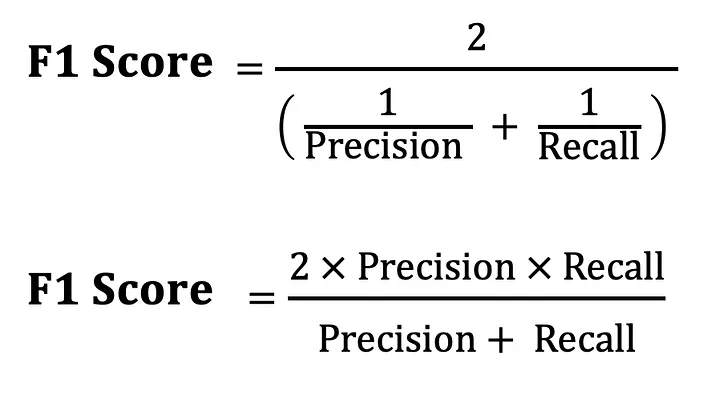


- The F1 score will always be a value between 0 and 1
- An F1 score closer to 1 indicates high precision and recall for a model, which is ideal
- F1 score closer to 0 indicates poor precision and recall.
- A low F1 score indicates that you may need to adjust the model’s parameters or consider using a different algorithm or approach.

### ***Example:***

- While diagnosing a disease, F1-Score tells that how many healthy and sick patients you have in your dataset.
- The F1 score is particularly valuable in scenarios where there is an imbalance between positive and negative classes. For example, in fraud detection, where the number of non-fraudulent transactions far exceeds fraudulent ones, the F1 score provides a balanced assessment of the model’s ability to correctly identify both positive and negative instances.

 # <span style='color:Green'>  ***Calculating f1 Score*** </span>


In [242]:
f1 = f1_score(y_test, y_pred)
f1

0.8615384615384616

***

***

***

 # <span style='color:Blue'>  ***6. ROC CURVE*** </span>

- The ROC (Receiver Operating Curve)  is a graphical representation of a model’s ability to distinguish between classes. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 — Specificity) for different classification thresholds.
- ROC is used extensively in diagnostic radiology and medical testing.
  

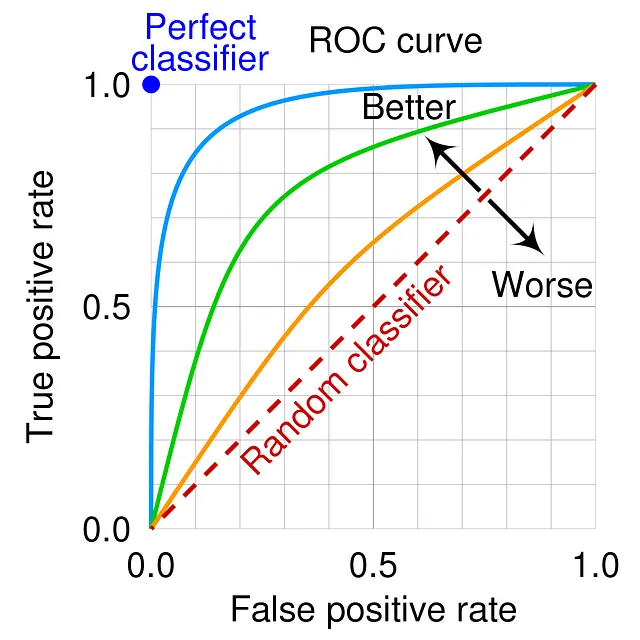


- An ROC is a system which seeks to determine how accurately medical diagnostics tests can distinguish between positive and negative cases. The ROC is basically a separator of two overlapping probability distributions for positive and negative cases. If there is perfect overlap or large amount of overlap, then the two categories are less separable. Complete separation of the two distributions implies a perfectly discriminating test..

### ***Key Terminologies***
- Sensitivity (True Positive Rate): The proportion of actual positive samples correctly predicted.
- Specificity (True Negative Rate): The proportion of actual negative samples correctly predicted

### ***How to create a ROC curve***

1. ***Predict Probabilities*** 
When you ask a classification model whether something is “spam” or “not spam”, it doesn’t simply guess. Internally, the model calculates a probability.

2. ***Test Different Thresholds:*** If the model directly classifies based on its internal score, we’d have to set a threshold. For instance, you might say “If the score is above 0.8, call it spam.” But is 0.8 the right threshold? What if 0.7 is better? Or 0.9?

3. ***Track TPR and FPR***: TPR (True Positive Rate) is about of all actual spam emails, how many did we correctly call “spam.” FPR (False Positive Rate) is about of all actual “not spam” emails, how many did we wrongly call “spam”?

4. ***Plot:*** For each threshold, plot TPR on the y-axis and FPR on the x-axis. Connect the dots to form a curve.


### ***How to interpret it***

- ***Top-Left Corner is Best***: If the curve is closer to the top-left corner, that’s great! It means we’re correctly identifying spam without mislabeling many genuine emails. (Maximum True Positives, minimum false positives)
- ***Above the Diagonal Line*** If the curve is above the diagonal line (from bottom-left to top-right), our model is better than just random guessing because the diagonal line means where TPR = FPR.
- ***Area Under Curve (AUC)*** The bigger the area under the curve (closer to 1), the better our model is.

***

***

***

 # <span style='color:Blue'>  ***7. AUC (Area Under the Curve)*** </span>

- AUC, which stands for “Area Under the ROC Curve,” quantifies a classifier’s performance. The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) over various thresholds. Instead of assessing a model through the ROC curve visually, AUC summarizes it into a single numerical value, with a higher AUC indicating superior model performance.

- AUC represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.
- In simpler terms, it measures the model’s ability to distinguish between positive and negative classes.

### ***Interpreting AUC Values***
- AUC = 0.5: This implies that the classifier’s performance is equivalent to random guessing (akin to a coin toss). It corresponds to the diagonal line from (0,0) to (1,1) on the ROC plot.
- 0.5 < AUC < 1: Indicates that the classifier outperforms random guessing. The closer the value is to 1, the better the classifier is at differentiating between positive and negative instances.
- AUC = 1: A perfect classifier that flawlessly distinguishes between positive and negative classes. It’s a theoretical value and seldom achieved in real-world applications.

In [223]:

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=2)


In [224]:
# Train the model

LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_prob = LR.predict_proba(X_test)[:, 1]

C:\Users\Malaika ahmad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [225]:
# Compute ROC curve and ROC area

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [226]:
fpr

array([0.        , 0.        , 0.        , 0.03225806, 0.03225806,
       0.06451613, 0.06451613, 0.12903226, 0.12903226, 0.16129032,
       0.16129032, 0.19354839, 0.19354839, 0.22580645, 0.22580645,
       0.51612903, 0.51612903, 1.        ])

In [227]:
tpr

array([0.        , 0.03333333, 0.13333333, 0.13333333, 0.76666667,
       0.76666667, 0.8       , 0.8       , 0.83333333, 0.83333333,
       0.86666667, 0.86666667, 0.93333333, 0.93333333, 0.96666667,
       0.96666667, 1.        , 1.        ])

In [228]:
roc_auc

0.9301075268817205

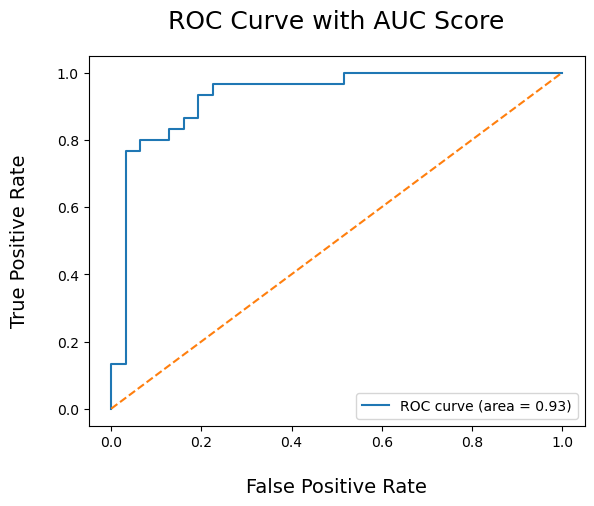

In [239]:
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')

# [0, 1] (first occurrence): This specifies the x-coordinates of the line to be plotted. It starts at 0 and ends at 1.
# [0, 1] (second occurrence): This specifies the y-coordinates of the line to be plotted. It starts at 0 and ends at 1
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate',labelpad=20,fontsize=14)
plt.ylabel('True Positive Rate',labelpad=20,fontsize=14)
plt.title('ROC Curve with AUC Score',pad=20,fontsize=18)
plt.legend()
plt.show()

***

### ***Summary Analysis***
- AUC Score (0.93): The Area Under the ROC Curve (AUC) score of 0.93 indicates a high level of discrimination by the model between the positive class (presence of heart disease) and the negative class (absence of heart disease). A score close to 1.0 suggests excellent model performance.
  
- F1 Score (0.86): The F1 score value of 0.86 indicates a good balance between precision and recall. This suggests that the model has a balanced approach to handling both false positives and false negatives.
Recall (0.93)

- The recall (sensitivity) of 0.93 shows that the model correctly identifies 93% of actual positive cases (patients with heart disease). This high recall is crucial in medical diagnosis where missing a positive case can have severe consequences.
Precision (0.80)

- The precision of 0.80 indicates that 80% of the positive predictions made by the model are correct. While this is a solid precision score, it also means that there is a 20% false positive rate, where patients are incorrectly identified as having heart disease.
Accuracy (0.85)

- An accuracy of 0.85 means that 85% of all predictions (both positive and negative) made by the model are correct. 

***